In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# Part 1
To do: choose 1 variable and plot 4 different ways

Variable: price of house

In [6]:
sns.set(style="whitegrid")

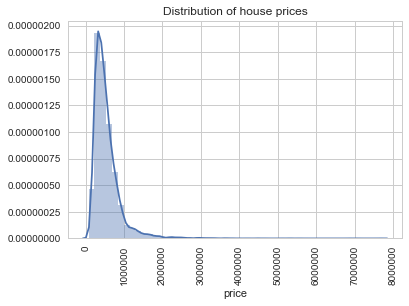

In [7]:
# Plot 1
x = data['price'].copy()
sns.distplot(x)
plt.title('Distribution of house prices')
plt.xticks(rotation=90)
plt.show()

Pros: one histogram for the entire county, can see the range of prices
Cons: the range of prices simply to broad to be useful

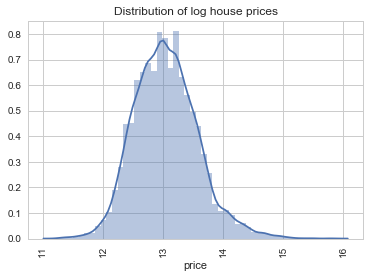

In [8]:
# Plot 2 - use logarithmic prices
x = data['price'].copy().apply(np.log)
sns.distplot(x)
plt.title('Distribution of log house prices')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# pros: distribution makes more sense
# cons: numbers are not intuitive. What does 13 feel like?

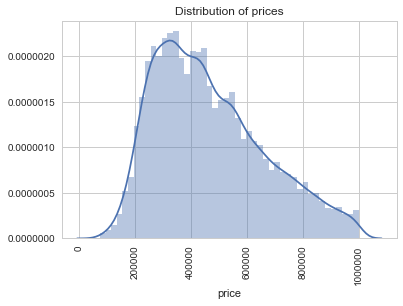

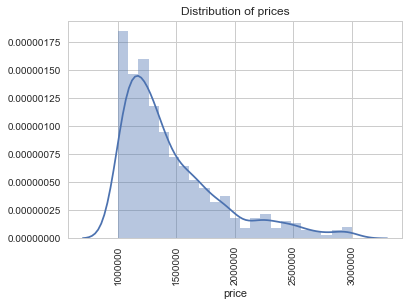

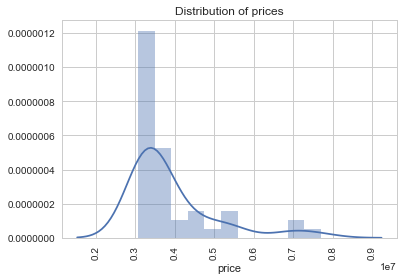

In [9]:
# plot 3: histogram by particular range (i.e. for each log range plot a different histogram)
bp = [0, 1e6, 3*1e6, 8*1e6]
for ii in range(1,len(bp)):
    x = data.loc[(data['price'] > bp[ii-1])& (data['price'] <= bp[ii]) ,'price'].copy()
    sns.distplot(x)
    plt.title('Distribution of prices')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# pros: you can see prices more clearly
# cons: the kernel density estimate plotted on the y-axis is not very intuitive

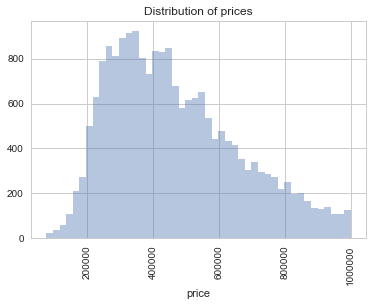

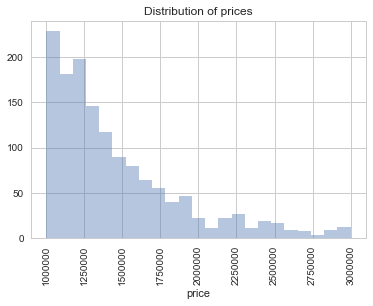

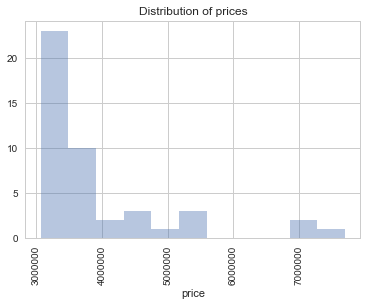

In [10]:
# plot 4: histogram by particular range (i.e. for each log range plot a different histogram), no kde
bp = [0, 1e6, 3*1e6, 8*1e6]
for ii in range(1,len(bp)):
    x = data.loc[(data['price'] > bp[ii-1])& (data['price'] <= bp[ii]) ,'price'].copy()
    sns.distplot(x, kde=False)
    plt.title('Distribution of prices')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# pros: it is easier to see both the prices and the count of instances
# cons:?

# Part 2
2 continuous variables, 3 different ways

var 1: price
var 2: square footage of living room

In [11]:
y = data['price'].copy()
x = data['sqft_living'].copy()

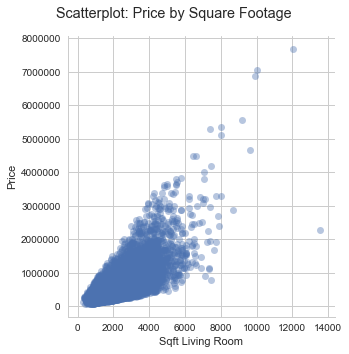

In [12]:
# plot 1
g = sns.lmplot(y='price', # Variable 1.
               x='sqft_living', # Variable 2.
               data=data, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Price")
g.set_xlabels("Sqft Living Room")
g.fig.suptitle('Scatterplot: Price by Square Footage')
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
# pros: existence of basic relationship visible
# cons: can't see the regression line

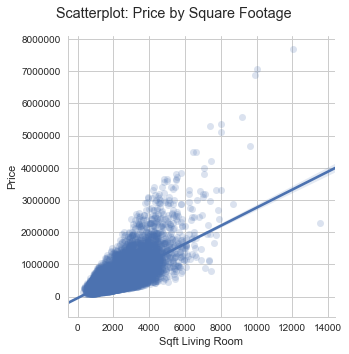

In [13]:
# plot 2
g = sns.lmplot(y='price', # Variable 1.
               x='sqft_living', # Variable 2.
               data=data, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.2}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Price")
g.set_xlabels("Sqft Living Room")
g.fig.suptitle('Scatterplot: Price by Square Footage')
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
# pros: can see the data and the regression line
# cons: difficult to grasp cross sectional distribution

In [14]:
data2 = data[['sqft_living']].copy()
# data2.head()

In [15]:
data2 = data2.apply(lambda x: 100*np.floor(x.astype(int) //100)).copy()

In [16]:
data3 = data['price'].to_frame().copy().join(data2)

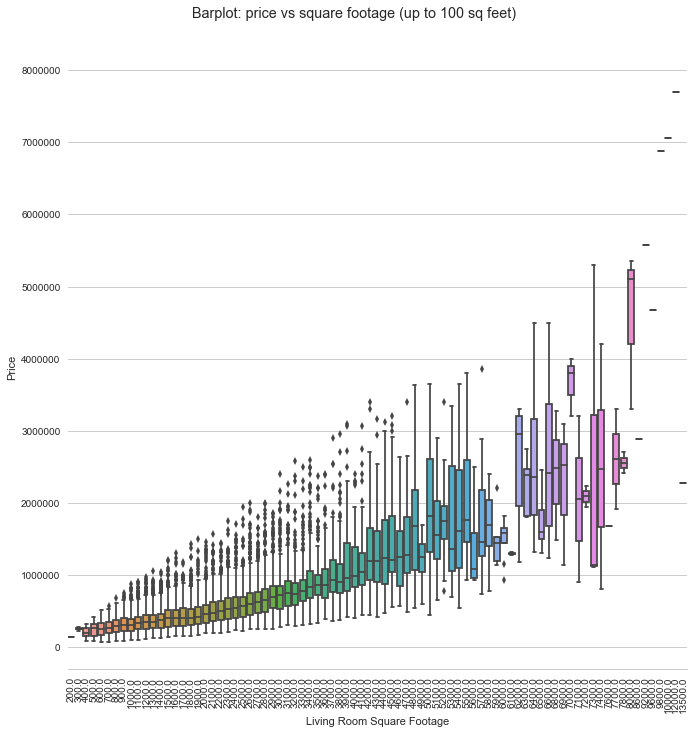

In [17]:
# plot 3: box plot of price versus square footage living room for steps of 100 sqft
g = sns.factorplot( x='sqft_living', y='price', data=data3,
                   size=10, kind="box", palette=None) #"pastel"
g.despine(left=True)
g.set_ylabels("Price")
g.set_xlabels("Living Room Square Footage")
plt.xticks(rotation=90, fontsize=10)
g.fig.suptitle('Barplot: price vs square footage (up to 100 sq feet)')
plt.subplots_adjust(top=0.9)
plt.show()

In [ ]:
# pros: can see the relationship between footage (to within 100 sqft) and price, while grasping also the cross-sectional (i.e. for given price) distribution 
# cons: 

# Part 3
price and zip code, 6 different ways

In [18]:
#plot 1: average price by zip code
avePriceByZipCode = data.loc[:,['price','zipcode']].groupby(['zipcode'], axis=0).mean()
avePriceByZipCode['zipcode'] = avePriceByZipCode.index
avePriceByZipCode.index.name = 'index'

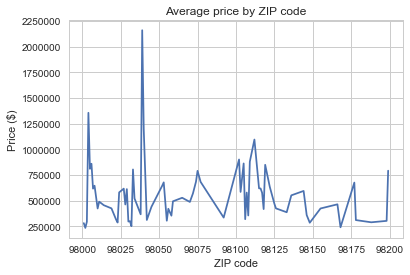

In [19]:
plt.plot(avePriceByZipCode['zipcode'].astype(float), avePriceByZipCode['price'].astype(float))
plt.title('Average price by ZIP code')
plt.xlabel('ZIP code')
plt.ylabel('Price ($)')
plt.show()

In [ ]:
# pros: you can see the relationship between zip code and average price
# cons: 
# the relationship not very intuitive because there is no intrinsic relationship (ZIP is just a label)
# you don't see the distribution

In [20]:
price75 = data.loc[:,['price','zipcode']].groupby(['zipcode'], axis=0).quantile(0.75)
price75['zipcode'] = price75.index
price75.index.name = 'index'

In [21]:
price25 = data.loc[:,['price','zipcode']].groupby(['zipcode'], axis=0).quantile(0.25)
price25['zipcode'] = price25.index
price25.index.name = 'index'

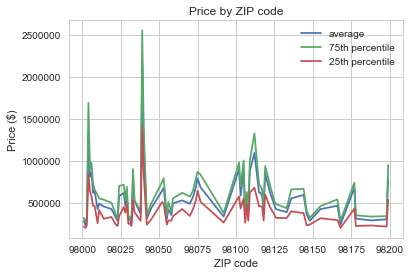

In [22]:
# plot 2
plt.plot(avePriceByZipCode['zipcode'].astype(float), avePriceByZipCode['price'].astype(float), label = 'average')
plt.plot(price75['zipcode'].astype(float), price75['price'].astype(float), label = '75th percentile')
plt.plot(price25['zipcode'].astype(float), price25['price'].astype(float), label = '25th percentile')
plt.title('Price by ZIP code')
plt.xlabel('ZIP code')
plt.ylabel('Price ($)')
plt.legend(loc='upper right')
plt.show()

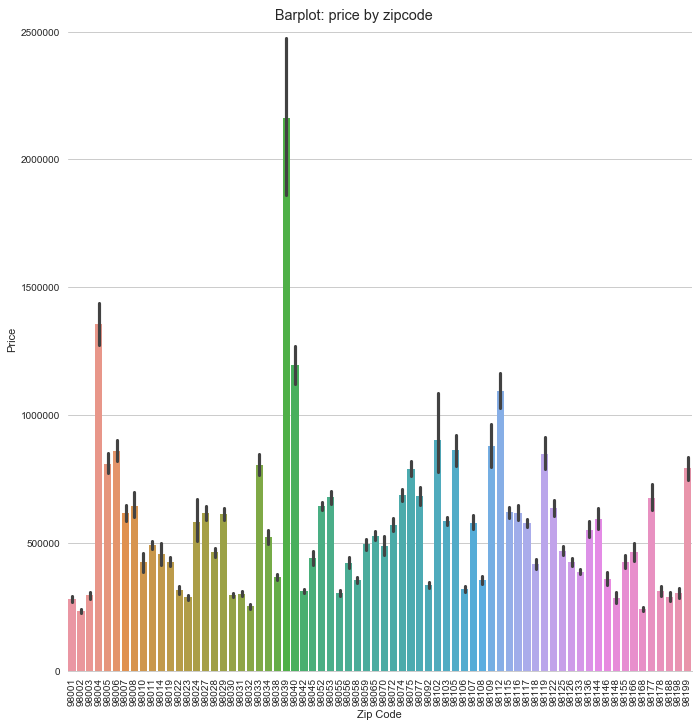

In [23]:
# Plot 3: Price by ZIP code using bar plot
g = sns.factorplot( x='zipcode', y='price', data=data,
                   size=10, kind="bar", palette=None) #"pastel"
g.despine(left=True)
g.set_ylabels("Price")
g.set_xlabels("Zip Code")
plt.xticks(rotation=90, fontsize=10)
g.fig.suptitle('Barplot: price by zipcode')
plt.show()

In [ ]:
# Pros: it is easier to grasp the prices and associate them to areas, as well as their ranges
# Cons: the coloring could be confusing (it doesn't actually have any meaning)
# ? how do I use a single color for this plot?

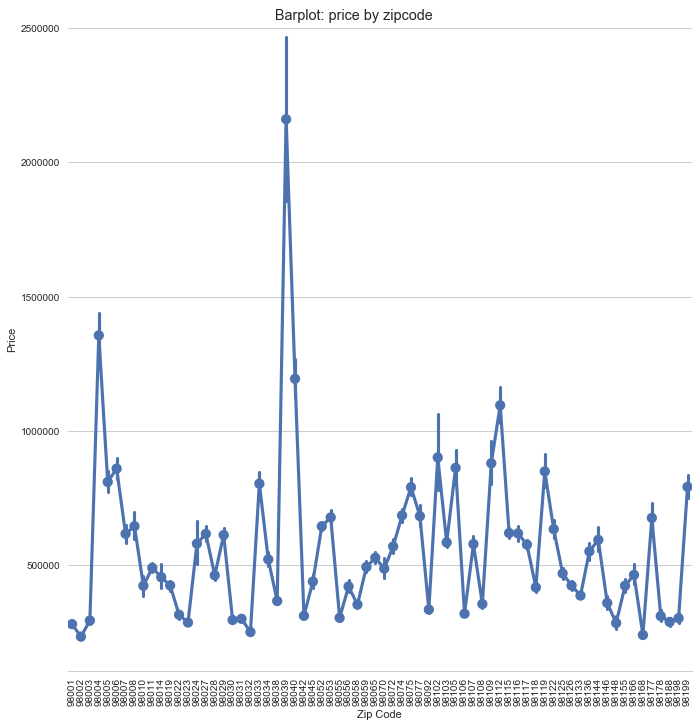

In [24]:
# Plot 4: Price by ZIP code using point plot
g = sns.factorplot( x='zipcode', y='price', data=data,
                   size=10, kind="point", palette=None) #"pastel"
g.despine(left=True)
g.set_ylabels("Price")
g.set_xlabels("Zip Code")
plt.xticks(rotation=90, fontsize=10)
g.fig.suptitle('Barplot: price by zipcode')
plt.show()

In [ ]:
# pros: you can see the price by zip code
# cons: the magnitude is not grasped very well because the y axis doesn't start at zero

In [25]:
# plot 5: sort by average price (if you want to be able to identify a zip code that matches your price range)
avePriceByZipCodeS = avePriceByZipCode.sort_values('price', axis=0)

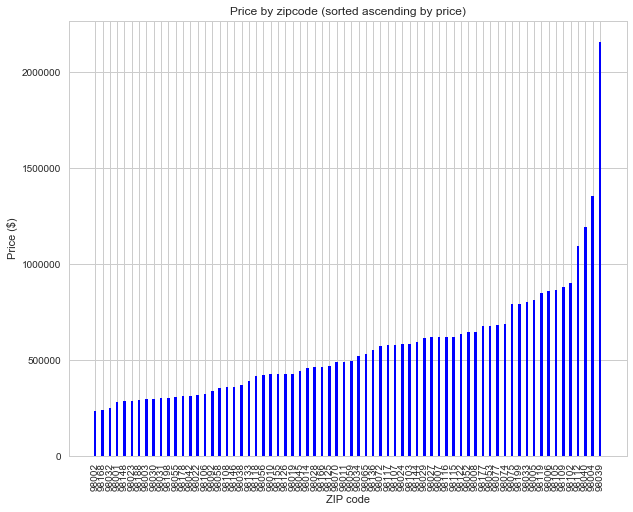

In [26]:
plt.figure(figsize=(10,8))
y1 = avePriceByZipCodeS['price'].values.astype(float)
zipcodes = avePriceByZipCodeS['zipcode'].values
inds = np.arange(y1.shape[0])
width = 0.35
plt.bar(inds, y1, width,color='b')
plt.title('Price by zipcode (sorted ascending by price)')
plt.xlabel('ZIP code')
plt.ylabel('Price ($)')
plt.xticks(inds,zipcodes, rotation = 90)
plt.show()

In [ ]:
# pros: this enables a prospective buyer to identify zip codes where they afford to buy
# cons: it is not very easy to see exactly where the demarcation point would be for a given amount of USD

In [27]:
budget = 500000

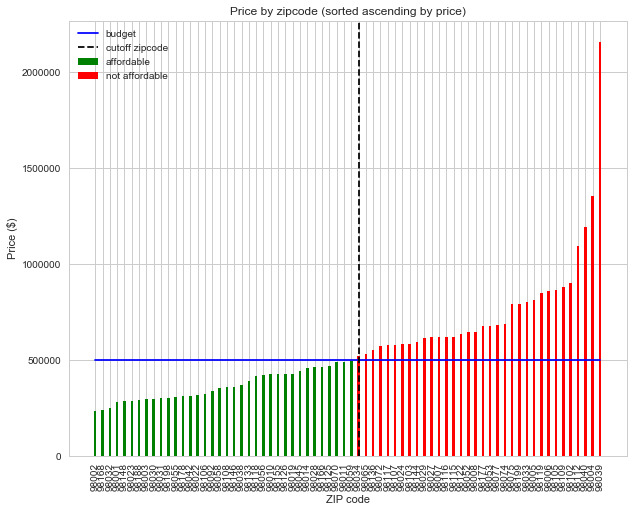

In [28]:
# plot 6
plt.figure(figsize=(10,8))
y1 = avePriceByZipCodeS['price'].values.astype(float)
zipcodes = avePriceByZipCodeS['zipcode'].values
inds = np.arange(y1.shape[0])
width = 0.35
#plt.bar(inds, y1, width,color='b')
plt.plot(inds, budget*np.ones(len(inds)),color='b', label='budget')
plt.title('Price by zipcode (sorted ascending by price)')
plt.xlabel('ZIP code')
plt.ylabel('Price ($)')
plt.xticks(inds,zipcodes, rotation = 90)
# idx = list(y1> budget).index(True)
np_array = np.array(y1)    
item_index = np.where(np_array>=budget)
idx = item_index[0][0]
plt.axvline(x=idx,color='k', linestyle='--', label='cutoff zipcode')
plt.bar(inds[0:idx], y1[0:idx], width, color='g', label='affordable')
plt.bar(inds[idx:], y1[idx:], width, color='r', label='not affordable')
plt.legend(loc='upper left')
plt.show()


In [ ]:
# pros: you can relatively easily see which zip codes you afford